In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### Importing Libraries

In [3]:
!ls

drive  sample_data


In [0]:
# Changing working directory
import os
os.chdir('./drive/My Drive/EVA/assignment/')

In [0]:
# Loading json file with images
with open('via_export_coco.json') as f:
  data = json.load(f)

In [7]:
# Checking keys
data.keys()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])

## Images and Annotations

We are interested only in images and annotations details

In [0]:
# Taking only images
images = data['images']

In [9]:
images[0:5]

[{'date_captured': '',
  'file_name': '1.jpg',
  'height': 388,
  'id': 0,
  'license': 1,
  'width': 386},
 {'date_captured': '',
  'file_name': '75c0f6259ba49d729293b9544a067235.jpg',
  'height': 426,
  'id': 1,
  'license': 1,
  'width': 637},
 {'date_captured': '',
  'file_name': '83-833982_lab-dog-images-download.jpg',
  'height': 716,
  'id': 2,
  'license': 1,
  'width': 1000},
 {'date_captured': '',
  'file_name': '99-996313_jiffpom-wallpapers-wallpaper-cave-jiffpom-dog.jpg',
  'height': 1142,
  'id': 3,
  'license': 1,
  'width': 1152},
 {'date_captured': '',
  'file_name': '240-2403024_beagle-dog-cute-animal-pet-loyal-transparent-beagle.png',
  'height': 1016,
  'id': 4,
  'license': 1,
  'width': 860}]

In [0]:
# Creating empty dictionary to store images and annotations details
img_dict = {}

In [0]:
# Storing values of images wrt id
for img in images:
  id = img['id']
  img_dict[str(id)] = {'file_name': img['file_name'],'height' : img['height'], 'width' : img['width']}

In [12]:
img_dict['0']

{'file_name': '1.jpg', 'height': 388, 'width': 386}

In [0]:
# Selecting only annotations data from the complete data
annotations = data['annotations']

In [14]:
annotations[0]

{'area': 124166,
 'bbox': [23, 4, 343, 362],
 'category_id': 1,
 'id': 0,
 'image_id': '0',
 'iscrowd': 0,
 'segmentation': [23, 4, 366, 4, 366, 366, 23, 366]}

In [0]:
# Creating an empty list which will be converted to dataframe
annotate = []

In [16]:
a, b, c, d = [140, 47, 923, 1036]
print(a,b,c,d)

140 47 923 1036


In [0]:
for ant in annotations:
  id = ant['image_id']
  img_height = img_dict[id]['height']
  img_width = img_dict[id]['width']
  img_name = img_dict[id]['file_name']
  bb_x, bb_y, bb_width, bb_height = ant['bbox']
  img_height_norm = img_height/img_height
  img_width_norm = img_width/img_width
  bb_x_norm = bb_x/img_width
  bb_y_norm = bb_y/img_height
  bb_width_norm = bb_width/img_width
  bb_height_norm = bb_height/img_height
  a = {'file_name':img_name, 'img_height':img_height, 'img_width':img_width, 'img_height_norm' : img_height_norm, 'img_width_norm' : img_width_norm,
       'bb_x_norm' : bb_x_norm, 'bb_y_norm':bb_y_norm, 'bb_width_norm' : bb_width_norm, 'bb_height_norm' : bb_height_norm}
  annotate.append(a)


In [50]:
df = pd.DataFrame(annotate)
df.head()

,file_name,img_height,img_width,img_height_norm,img_width_norm,bb_x_norm,bb_y_norm,bb_width_norm,bb_height_norm
0,1.jpg,388,386,1.0,1.0,0.059585,0.010309,0.888601,0.932990
1,75c0f6259ba49d729293b9544a067235.jpg,426,637,1.0,1.0,0.202512,0.100939,0.646782,0.748826
2,83-833982_lab-dog-images-download.jpg,716,1000,1.0,1.0,0.195000,0.175978,0.711000,0.722067
3,99-996313_jiffpom-wallpapers-wallpaper-cave-ji...,1142,1152,1.0,1.0,0.121528,0.041156,0.801215,0.907180
4,240-2403024_beagle-dog-cute-animal-pet-loyal-t...,1016,860,1.0,1.0,0.139535,0.036417,0.775581,0.924213


In [51]:
df.shape

(100, 9)

In [52]:
df_updated = df[['file_name','bb_height_norm','bb_width_norm']]
df_updated.head()

,file_name,bb_height_norm,bb_width_norm
0,1.jpg,0.932990,0.888601
1,75c0f6259ba49d729293b9544a067235.jpg,0.748826,0.646782
2,83-833982_lab-dog-images-download.jpg,0.722067,0.711000
3,99-996313_jiffpom-wallpapers-wallpaper-cave-ji...,0.907180,0.801215
4,240-2403024_beagle-dog-cute-animal-pet-loyal-t...,0.924213,0.775581


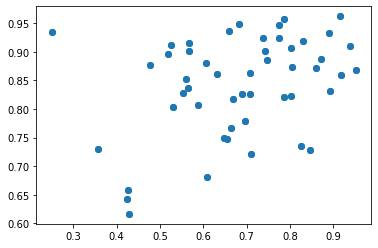

In [53]:
plt.scatter(x=df_updated['bb_width_norm'],y=df_updated['bb_height_norm'])

In [54]:
X = df_updated[df_updated.columns[1:]]
X.head()

,bb_height_norm,bb_width_norm
0,0.932990,0.888601
1,0.748826,0.646782
2,0.722067,0.711000
3,0.907180,0.801215
4,0.924213,0.775581


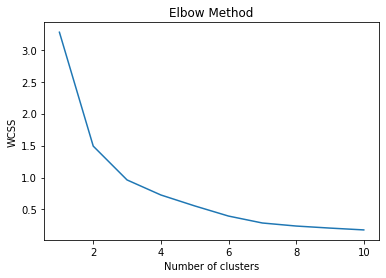

In [55]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

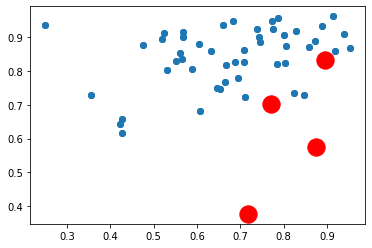

In [56]:
# From above method we select k=4

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(x=df_updated['bb_width_norm'],y=df_updated['bb_height_norm'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()